# Excited state calculation LiH

In order to obtain the excited state of the LiH molecule, we will use the VQE circuit to calculat the ground state wavefunction. We can define an effective Hamiltonian with the lowest eigenstate being the first excited state and  the lowest eigenvalue being the energy of this state. In other words, we can shift the ground state energy to the first excited state. We will vary parameters, and thus E<sup>0</sup>, to hit the minimum of the excited state:

H<sup>exc</sup> = H − E<sup>0</sup>|ψ0><ψ0|



In [1]:
import matplotlib.pyplot as plt
import tequila as tq

As we shown in LiH_molecule.ipynb, we can reduce the number of Hamiltonian terms from 631 to 135 by specifing active space. It allows to speed up calculation without any significant impact on the results.

In [2]:
ground_state_energy = []
excited_state_energy = []
basis = "sto-3g"
#define active space 
active_orbitals = {"A1":[1,2], "B1":[0]}
P0 = tq.paulis.Projector("|00>")

# run VQE 
def vqe(H):
    results = []
    for i in range(2):
        U = tq.gates.Ry((i, "a"), 0)
        U += tq.gates.CNOT(0, 1) + tq.gates.CNOT(0, 2)
        U += tq.gates.CNOT(1, 3) + tq.gates.X([2, 3])
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U2.dagger() + U)
            E -= data.energy * S2
            angles = {**angles, **data.angles}

        result = tq.optimizer_scipy.minimize(E, method="bfgs", variables=active_vars, initial_values=angles)
        results.append((result, U))
    return results


for r in [0.5 + 0.1*i for i in range(25)]:
    #define molecule
    lih = tq.chemistry.Molecule(geometry = "H 0.0 0.0 0.0\nLi 0.0 0.0 {r}".format(r=r), basis_set=basis, active_orbitals=active_orbitals)
    H = lih.make_hamiltonian()
    value = vqe(H)
    
    ground_state_energy.append(value[0][0].energy)
    excited_state_energy.append(value[1][0].energy)

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-6.68330565  angles= {(0, 'a'): 0.0}  samples= None
E=-6.68351666  angles= {(0, 'a'): -0.01393747329711914}  samples= None
E=-6.68469495  angles= {(0, 'a'): -0.0696873664855957}  samples= None
E=-6.69466529  angles= {(0, 'a'): -0.29268693923950195}  samples= None
E=-6.80378816  angles= {(0, 'a'): -1.184685230255127}  samples= None
E=-6.83498146  angles= {(0, 'a'): -4.752678394317627}  samples= None
E=-7.02755438  angles= {(0, 'a'): -2.932927757000561}  samples= None
E=-7.02842713  angles= {(0, 'a'): -3.1403610052734674}  samples= None
E=-7.02897207  angles= {(0, 'a'): -3.060911701520822}  s

E=-7.05550861  angles= {(1, 'a'): 0.02852657377308491, (0, 'a'): -3.1130571475623605}  samples= None
Optimization terminated successfully.
         Current function value: -7.055509
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.08473092  angles= {(0, 'a'): 0.0}  samples= None
E=-7.08483582  angles= {(0, 'a'): -0.009466409683227539}  samples= None
E=-7.08556108  angles= {(0, 'a'): -0.047332048416137695}  samples= None
E=-7.09332253  angles= {(0, 'a'): -0.19879460334777832}  samples= None
E=-7.19621087  angles= {(0, 'a'): -0.8046448230743408}  sam

E=-7.15532398  angles= {(1, 'a'): 0.031006033040978365, (0, 'a'): -3.110467506252764}  samples= None
Optimization terminated successfully.
         Current function value: -7.155324
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.16737690  angles= {(0, 'a'): 0.0}  samples= None
E=-7.16754993  angles= {(0, 'a'): -0.012140512466430664}  samples= None
E=-7.16875435  angles= {(0, 'a'): -0.06070256233215332}  samples= None
E=-7.18168727  angles= {(0, 'a'): -0.25495076179504395}  samples= None
E=-7.34721570  angles= {(0, 'a'): -1.0319435596466064}  samp

E=-7.16973591  angles= {(1, 'a'): 0.19447928667068481, (0, 'a'): -3.08765149403789}  samples= None
E=-7.20522070  angles= {(1, 'a'): 0.053953923176508774, (0, 'a'): -3.08765149403789}  samples= None
Optimization terminated successfully.
         Current function value: -7.205221
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.21430436  angles= {(0, 'a'): 0.0}  samples= None
E=-7.21470466  angles= {(0, 'a'): -0.018624067306518555}  samples= None
E=-7.21737186  angles= {(0, 'a'): -0.09312033653259277}  samples= None
E=-7.24468437  angles= {(0, 'a'):

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 2 expectationvalues
gradient        : 6 expectationvalues

active variables : 1

E=-7.22491598  angles= {(1, 'a'): 0.0, (0, 'a'): -28.182303966248856}  samples= None
E=-7.13590860  angles= {(1, 'a'): 0.3326869010925293, (0, 'a'): -28.182303966248856}  samples= None
E=-7.24023485  angles= {(1, 'a'): 0.09175556722470814, (0, 'a'): -28.182303966248856}  samples= None
Optimization terminated successfully.
         Current function value: -7.240235
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True


There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for hf.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.26249597  angles= {(0, 'a'): 0.0}  samples= None
E=-7.26367411  angles= {(0, 'a'): -0.0323336124420166}  samples= None
E=-7.27101511  angles= {(0, 'a'): -0.161668062210083}  samples= None
E=-7.33918182  angles= {(0, 'a'): -0.6790058612823486}  samples= None
E=-7.76386201  angles= {(0, 'a'): -2.748357057571411}  samples= None
E=-7.40782674  angles= {(0, 'a'): -5.02464337348938}  samples= None
E=-7.77263071  angles= {(0, 'a'): -2.9673930926776917}  samples= None
E=-7.47020105  angles= {(0, 'a'): -4.768284998870463}  samples= None
E=-7.77291486  angles= {(0, 'a'): -3.007669589535782}  sampl

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.31846131  angles= {(0, 'a'): 0.0}  samples= None
E=-7.32163316  angles= {(0, 'a'): -0.05368757247924805}  samples= None
E=-7.33993067  angles= {(0, 'a'): -0.26843786239624023}  samples= None
E=-7.48223619  angles= {(0, 'a'): -1.127439022064209}  samples= None
E=-7.49720459  angles= {(0, 'a'): -4.563443660736084}  samples= None
E=-7.72901986  angles= {(0, 'a'): -2.836207937065091}  samples= None
E=-7.69690672  angles= {(0, 'a'): -3.445453139143476}  samples= None
E=-7.72923557  angles= {(0, 'a'): -2.8806126405460284}  samples= None
Optimization terminated successfully.
         Current function value: -7.729236
         Iterations: 2
         Function evaluations: 8
         Gradient evaluations: 8

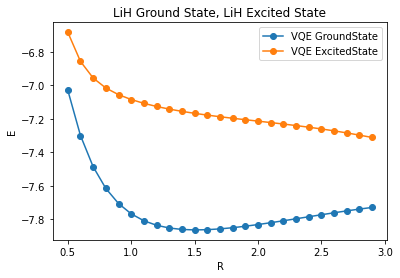

In [3]:


r =  [0.5 + 0.1*i for i in range(len(ground_state_energy))]
plt.figure()
plt.xlabel('R')
plt.ylabel('E')
plt.title("LiH Ground State, LiH Excited State")
plt.plot(r, ground_state_energy, marker="o", label="VQE GroundState")
plt.plot(r, excited_state_energy, marker="o", label="VQE ExcitedState")
plt.legend()
plt.show()